#  Group 27
## Project Objective:
Can you accurately predict insurance costs?

### Columns:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [6]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [85]:
df = pd.read_csv('insurance.csv',index_col=False)

# Data type

The Medical Costs data set contains 1338 observations, each represents a consumer. There are 7 variables in the data set, all variables are numerical except for sex, smoker, and region. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Distribution of variables

After dropping duplicate rows, we implemented summary statistics to explore the distribution of varialbes. Age ranges from 18 to 60. The median age is 39 and mean is 39.22. The distribution of age is right skewed; the fraction of age ranging from 18 to 22 is 16.53%, slightly more than those at other ages. Variable bmi has a normal distribution with mean value of 30.66 and median of 30.40. Children has a right-skewed distribution, where 42.86% of consumers in the data set does not have children. Distribution of sex indicates that number of female and male are roughly equal. Charges range from $1121.87 to $63770.43 with mean of $13279.12 and median of $9386.12. 

In [108]:
# len(df[df['age']<=22])/len(df)

0.16529543754674644

In [91]:
df_dedup = df.drop_duplicates()
len(df_dedup)

1337

In [92]:
df_dedup.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
df_dedup.median()

age           39.0000
bmi           30.4000
children       1.0000
charges     9386.1613
dtype: float64

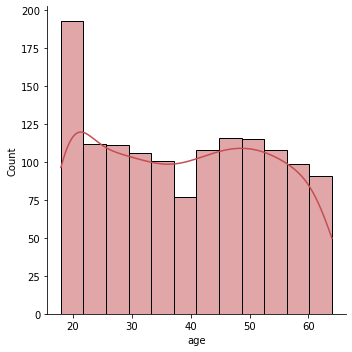

In [98]:
sns.displot(data=df_dedup, x='age',kde=True, color='r')

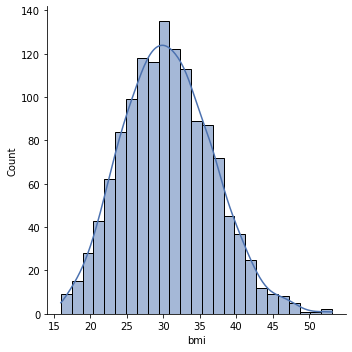

In [99]:
sns.displot(data=df_dedup, x='bmi',kde=True, color='b')

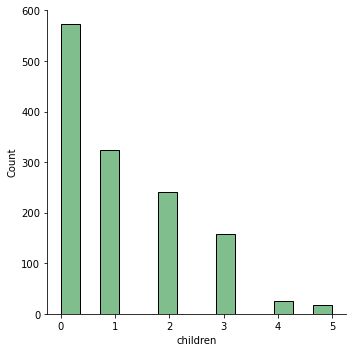

In [110]:
sns.displot(data=df_dedup, x='children', color='g')

In [116]:
fraction_children_0 = len(df[df['children']==0])/len(df)

0.42857142857142855

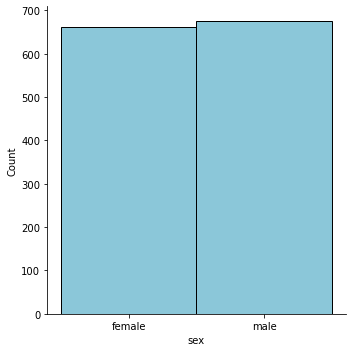

In [119]:
sns.displot(data=df_dedup, x='sex', color='c')

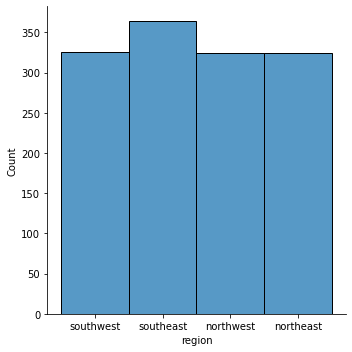

In [133]:
sns.displot(data=df_dedup, x='region')

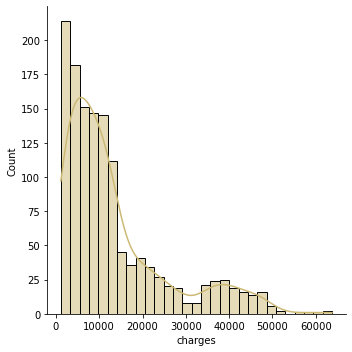

In [117]:
sns.displot(data=df_dedup, x='charges',kde=True, color='y')

# explore correlation between variables

We also plotted correlation between variables. Green dots are smokers, while orange dots are non-smokers. The plot shows that age and bmi have a positive relationship with charges. Among all consumers, smokers are charged more than non-smokers. 

In [147]:
# Question: how to interpret age vs. smoker? 

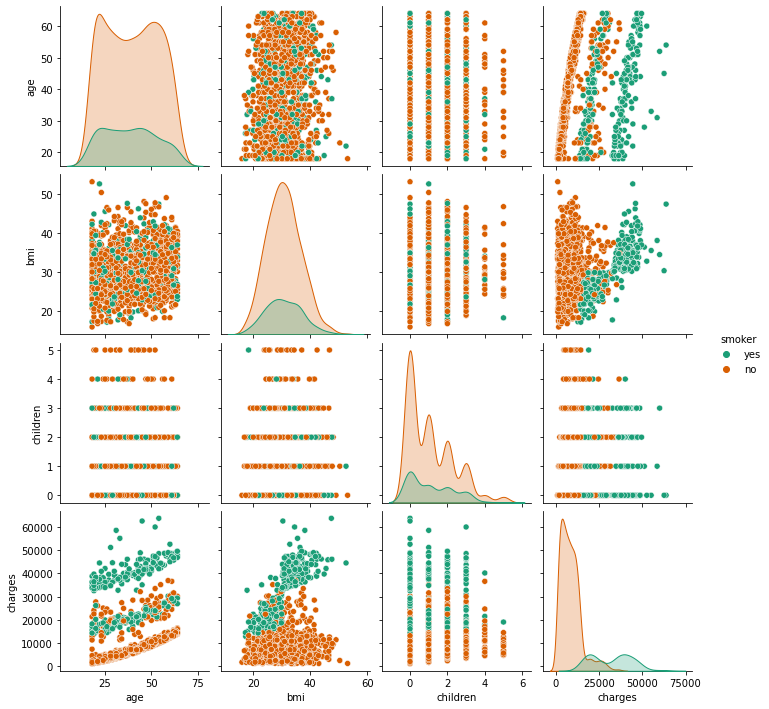

In [145]:
sns.pairplot(df, hue = 'smoker',palette='Dark2')

### [use previous figure instead of these] scatter plot to get an insight of data

In [148]:
# Here are individual plots showing relationship between each variable and charges.

# plot(df['age'],df['charges'],marker='o',color='blue',linestyle='None')
# xlabel('age')
# ylabel('insurance charges')
# show()

# plot(df['sex'],df['charges'],marker='o',color='red',linestyle='None')
# xlabel('sex')
# ylabel('insurance charges')
# show()

# plot(df['bmi'],df['charges'],marker='o',color='green',linestyle='None')
# xlabel('bmi')
# ylabel('insurance charges')
# show()

# plot(df['children'],df['charges'],marker='o',color='lightcoral',linestyle='None')
# xlabel('children')
# ylabel('insurance charges')
# show()

# plot(df['smoker'],df['charges'],marker='o',color='aquamarine',linestyle='None')
# xlabel('smoker')
# ylabel('insurance charges')
# show()

# plot(df['region'],df['charges'],marker='o',color='plum',linestyle='None')
# xlabel('region')
# ylabel('insurance charges')
# show()

### Implement regression of all features to predict insurance charges

We created 3 regression models: with all variables, all important variables, and with partial important variables, respectively. 

Model 1 has a minimum RMSE of 11703.64, AIC of 18960.68, and BIC of 19004.24. The adjusted R-squared value is 0.753. Observing p-values, we identified important features that have a strong correlation with insurance charges are: smoker, age, bmi, and children. The result implies that Model 1 contains noise data points such as sex. Based on this finding, we created a second model, which only include important features.

For Model 2, minimum RMSE is 11703.64, AIC is 18959.63, BIC is 18983.84, and R-squared value is 0.752. Although have a similar adjusted R-squared value with the first model, Model 2 achieve lower AIC and BIC.

We also conducted an experiment of removing statistically significant feature, children, and created a third model with only 3 predictors--age, bmi, and smoker. Removing children reduced the adjusted R-squared value of model 3 to 0.749, increased AIC to 18968.59, and BIC to 18987.95. The decrease in adjusted R-squared and increase in AIC and BIC indicate that variable children plays an important role in the accuracy of regression model.

The comparison result indicates that model 2 with all important variables outperforms other models. 

# Model 1: regression with all features

In [166]:
y,X = dmatrices('charges ~ age+sex+bmi+children+smoker+region', data=df,return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [191]:
from statsmodels.tools.eval_measures import rmse
# create regression model1
model1=sm.OLS(y_train,X_train)
result1=model1.fit()
print('R-squared:',result1.rsquared)
print('P-Values:\n',result1.pvalues)

# test model1
yhat1 = result1.predict(X_test)
# calculate rmse
print('Min_RMSE = ',rmse(y_test, yhat1).min())
print('AIC: ', result1.aic)
print('BIC: ', result1.bic)
result1.summary()

R-squared: 0.7548529554196934
P-Values:
 Intercept               1.350883e-27
sex[T.male]             1.796328e-01
smoker[T.yes]          2.971094e-256
region[T.northwest]     6.753626e-01
region[T.southeast]     4.329011e-02
region[T.southwest]     1.364669e-01
age                     3.375615e-61
bmi                     8.783668e-28
children                7.718855e-04
dtype: float64
Min_RMSE =  11703.644200390832
AIC:  18960.679539019842
BIC:  19004.24445778344


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     356.4
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          1.46e-276
Time:                        23:09:20   Log-Likelihood:                -9471.3
No. Observations:                 935   AIC:                         1.896e+04
Df Residuals:                     926   BIC:                         1.900e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.349e+04   1199.644    -11.246      0.000   -1.58e+04   -1.11e+04
sex[T.male]          -539.4815    401.728     -1.343      0.180   -1327.885     248.922
smoker[T.yes]        2.342e+04    483.264     48.469      0.000    2.25e+04    2.44e+04
region[T.northwest]  -242.3891    578.587     -0.419      0.675   -1377.884     893.105
region[T.southeast] -1172.4979    579.390     -2.024      0.043   -2309.567     -35.429
region[T.southwest]  -861.9992    578.378     -1.490      0.136   -1997.084     273.085
age                   256.4423     14.405     17.802      0.000     228.172     284.713
bmi                   397.6351     35.222     11.290      0.000     328.512     466.758
children              565.7420    167.682      3.374      0.001     236.661     894.823
==============================================================================
Omnibus:                      172.444   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.246
Skew:                           1.100   Prob(JB):                     4.75e-70
Kurtosis:                       4.832   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2: Regression model with only important features

In [197]:
y2,X2 = dmatrices('charges ~ age+bmi+children+smoker', data=df,return_type='dataframe')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

model2 = sm.OLS(y_train2,X_train2)
result2=model2.fit()
print('R-squared:',result2.rsquared)
print('P-Values:\n',result2.pvalues)

# test model2
yhat2 = result2.predict(X_test2)
# calculate rmse
print('Min_RMSE = ',rmse(y_test2, yhat2).min())
print('AIC: ', result2.aic)
print('BIC: ', result2.bic)
result2.summary()

R-squared: 0.7530226732271739
P-Values:
 Intercept         4.100891e-30
smoker[T.yes]    1.596291e-256
age               4.145734e-62
bmi               8.871734e-27
children          9.654316e-04
dtype: float64
Min_RMSE =  11703.642751224023
AIC:  18959.63437336665
BIC:  18983.837106013096


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     708.9
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          1.35e-280
Time:                        23:32:37   Log-Likelihood:                -9474.8
No. Observations:                 935   AIC:                         1.896e+04
Df Residuals:                     930   BIC:                         1.898e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.365e+04   1155.415    -11.815      0.000   -1.59e+04   -1.14e+04
smoker[T.yes]  2.335e+04    482.040     48.435      0.000    2.24e+04    2.43e+04
age             258.4589     14.396     17.953      0.000     230.206     286.712
bmi             372.5316     33.698     11.055      0.000     306.399     438.665
children        554.5647    167.492      3.311      0.001     225.859     883.271
==============================================================================
Omnibus:                      175.433   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.844
Skew:                           1.110   Prob(JB):                     2.37e-72
Kurtosis:                       4.882   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3: what if we keep reducing features?
### We may not need to include this model in our presentation. After all, this is just an experiment, and the result shows that variable Children plays an important role in regression model.

In [196]:
y3,X3 = dmatrices('charges ~ age+bmi+smoker', data=df,return_type='dataframe')
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=1)

model3 = sm.OLS(y_train3,X_train3)
result3=model3.fit()
print('R-squared:',result3.rsquared)
print('P-Values:\n',result3.pvalues)

# test model2
yhat3 = result3.predict(X_test3)
# calculate rmse
print('Min_RMSE = ',rmse(y_test3, yhat3).min())
print('AIC: ', result3.aic)
print('BIC: ', result3.bic)
result3.summary()

R-squared: 0.7501113475657972
P-Values:
 Intercept         3.928090e-28
smoker[T.yes]    3.075813e-255
age               2.804119e-62
bmi               3.342743e-26
dtype: float64
Min_RMSE =  11703.65196569242
AIC:  18968.591535900698
BIC:  18987.953722017854


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     931.6
Date:                Fri, 06 Aug 2021   Prob (F-statistic):          9.45e-280
Time:                        23:32:05   Log-Likelihood:                -9480.3
No. Observations:                 935   AIC:                         1.897e+04
Df Residuals:                     931   BIC:                         1.899e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.303e+04   1146.036    -11.368      0.000   -1.53e+04   -1.08e+04
smoker[T.yes]  2.336e+04    484.602     48.201      0.000    2.24e+04    2.43e+04
age             260.0872     14.465     17.981      0.000     231.700     288.474
bmi             369.8137     33.868     10.919      0.000     303.348     436.280
==============================================================================
Omnibus:                      175.431   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.939
Skew:                           1.113   Prob(JB):                     6.15e-72
Kurtosis:                       4.862   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""